In [1]:
#IMPORT LIBRARIES
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn import tree

import matplotlib.pyplot as plt
import graphviz
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus



In [2]:
#uploading of data set
lr=pd.read_csv('loan-recovery.csv')
lr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Borrower_ID              500 non-null    object 
 1   Age                      500 non-null    int64  
 2   Gender                   500 non-null    object 
 3   Employment_Type          500 non-null    object 
 4   Monthly_Income           500 non-null    int64  
 5   Num_Dependents           500 non-null    int64  
 6   Loan_ID                  500 non-null    object 
 7   Loan_Amount              500 non-null    int64  
 8   Loan_Tenure              500 non-null    int64  
 9   Interest_Rate            500 non-null    float64
 10  Loan_Type                500 non-null    object 
 11  Collateral_Value         500 non-null    float64
 12  Outstanding_Loan_Amount  500 non-null    float64
 13  Monthly_EMI              500 non-null    float64
 14  Payment_History          5

UNDERSTANDING THE DATA

In [3]:
#checking missing numbers
lr.isnull().sum()

,0
Borrower_ID,0
Age,0
Gender,0
Employment_Type,0
Monthly_Income,0
Num_Dependents,0
Loan_ID,0
Loan_Amount,0
Loan_Tenure,0
Interest_Rate,0


In [4]:
#  change the object type of some data columns having few unique to categories


for col in ['Gender','Employment_Type','Loan_Type','Payment_History','Recovery_Status','Collection_Method','Legal_Action_Taken']: # Replace with actual column names
  if lr[col].nunique() < 5: # Adjust the threshold as needed
    lr[col] = lr[col].astype('category')

lr.info()
lr.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Borrower_ID              500 non-null    object  
 1   Age                      500 non-null    int64   
 2   Gender                   500 non-null    category
 3   Employment_Type          500 non-null    category
 4   Monthly_Income           500 non-null    int64   
 5   Num_Dependents           500 non-null    int64   
 6   Loan_ID                  500 non-null    object  
 7   Loan_Amount              500 non-null    int64   
 8   Loan_Tenure              500 non-null    int64   
 9   Interest_Rate            500 non-null    float64 
 10  Loan_Type                500 non-null    category
 11  Collateral_Value         500 non-null    float64 
 12  Outstanding_Loan_Amount  500 non-null    float64 
 13  Monthly_EMI              500 non-null    float64 
 14  Payment_Hi

,Borrower_ID,Age,Gender,Employment_Type,Monthly_Income,Num_Dependents,Loan_ID,Loan_Amount,Loan_Tenure,Interest_Rate,...,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Payment_History,Num_Missed_Payments,Days_Past_Due,Recovery_Status,Collection_Attempts,Collection_Method,Legal_Action_Taken
0,BRW_1,59,Male,Salaried,215422,0,LN_1,1445796,60,12.39,...,1.727997e+06,2.914130e+05,4856.88,On-Time,0,0,Partially Recovered,1,Settlement Offer,No
1,BRW_2,49,Female,Salaried,60893,0,LN_2,1044620,12,13.47,...,1.180032e+06,6.652042e+05,55433.68,On-Time,0,0,Fully Recovered,2,Settlement Offer,No
2,BRW_3,35,Male,Salaried,116520,1,LN_3,1923410,72,7.74,...,2.622540e+06,1.031372e+06,14324.61,Delayed,2,124,Fully Recovered,2,Legal Notice,No


In [5]:
# check for duplicate

lr.duplicated().sum()

np.int64(0)

there are no duplicates

SUMMARY STATISTCS

In [6]:
# descriptive statistic for numerical variables

lr.describe()

,Age,Monthly_Income,Num_Dependents,Loan_Amount,Loan_Tenure,Interest_Rate,Collateral_Value,Outstanding_Loan_Amount,Monthly_EMI,Num_Missed_Payments,Days_Past_Due,Collection_Attempts
count,500.000000,500.000000,500.000000,5.000000e+02,500.00000,500.000000,5.000000e+02,5.000000e+02,500.000000,500.000000,500.000000,500.000000
mean,43.116000,134829.920000,1.476000,1.024907e+06,46.10400,11.192820,6.032240e+05,5.627260e+05,15861.536020,1.912000,70.678000,3.000000
std,12.733217,68969.356746,1.145447,5.907556e+05,18.23706,3.775209,7.457131e+05,4.723581e+05,18709.231315,2.110252,60.211038,2.807805
min,21.000000,15207.000000,0.000000,5.413800e+04,12.00000,5.020000,0.000000e+00,1.571283e+04,261.880000,0.000000,0.000000,0.000000
25%,32.000000,76343.250000,0.000000,4.629848e+05,36.00000,7.907500,0.000000e+00,1.822072e+05,4039.097500,1.000000,4.000000,1.000000
50%,44.000000,134929.500000,1.000000,9.971240e+05,48.00000,10.915000,2.327684e+05,4.133240e+05,9330.170000,2.000000,66.500000,2.000000
75%,53.000000,193086.250000,3.000000,1.557952e+06,60.00000,14.577500,1.111106e+06,8.324787e+05,20439.485000,3.000000,122.250000,4.000000
max,64.000000,249746.000000,3.000000,1.995325e+06,72.00000,17.970000,2.744395e+06,1.932396e+06,127849.230000,12.000000,180.000000,10.000000


In [7]:
# descriptive statistic of categorical variable

lr.describe(include='category')

,Gender,Employment_Type,Loan_Type,Payment_History,Recovery_Status,Collection_Method,Legal_Action_Taken
count,500,500,500,500,500,500,500
unique,2,3,4,3,3,4,2
top,Male,Salaried,Personal,On-Time,Fully Recovered,Calls,No
freq,311,292,220,306,296,129,476


from this we see that majority of the loan is fully recovered and the bank took no legal action for the greater part of the loan.

VISUALISATION OF DATA

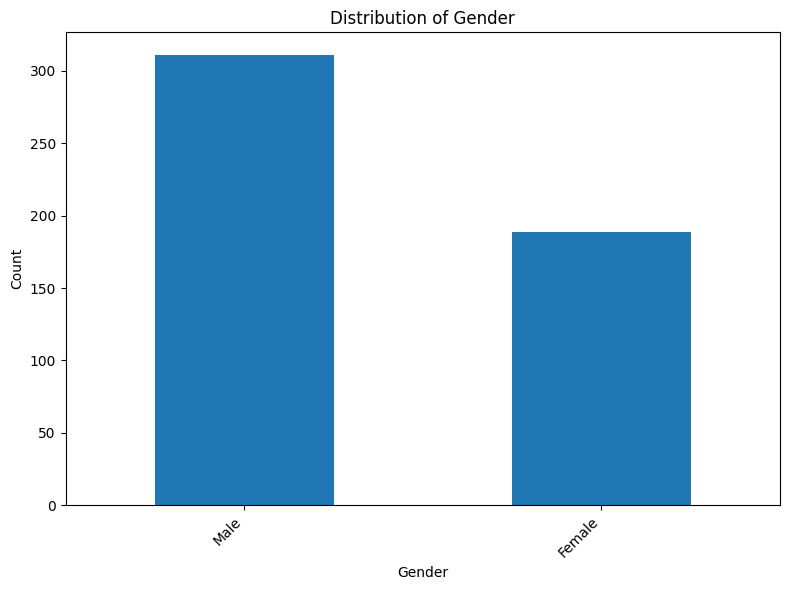

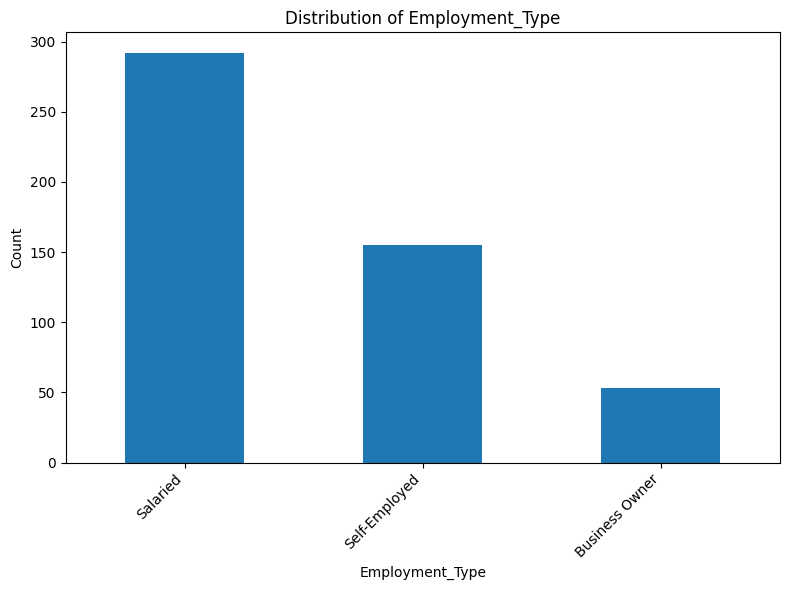

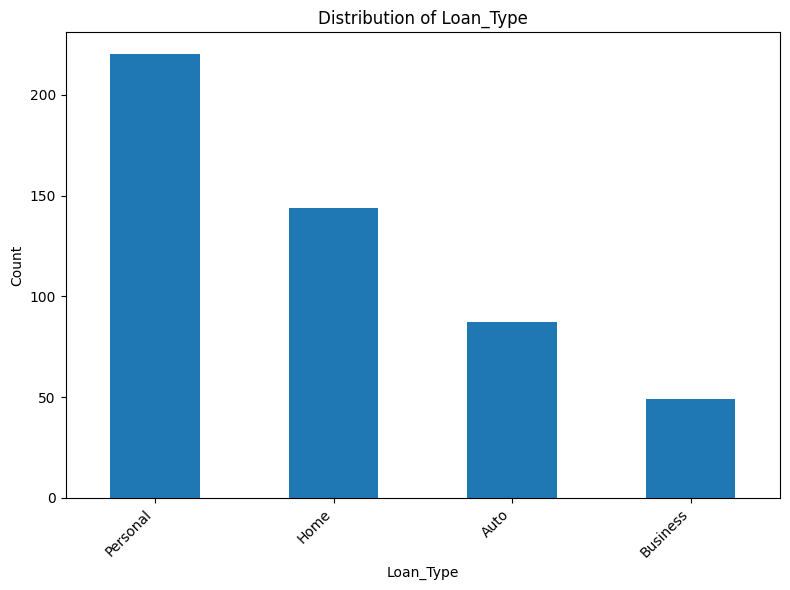

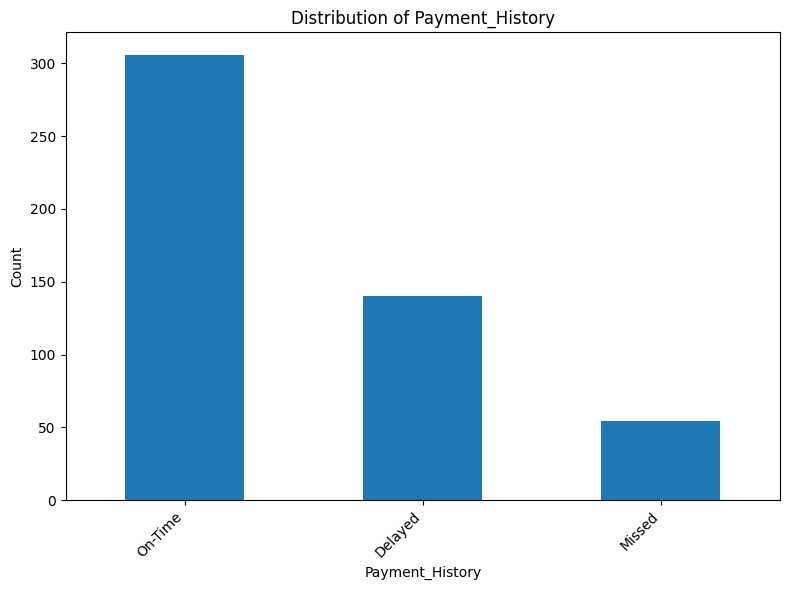

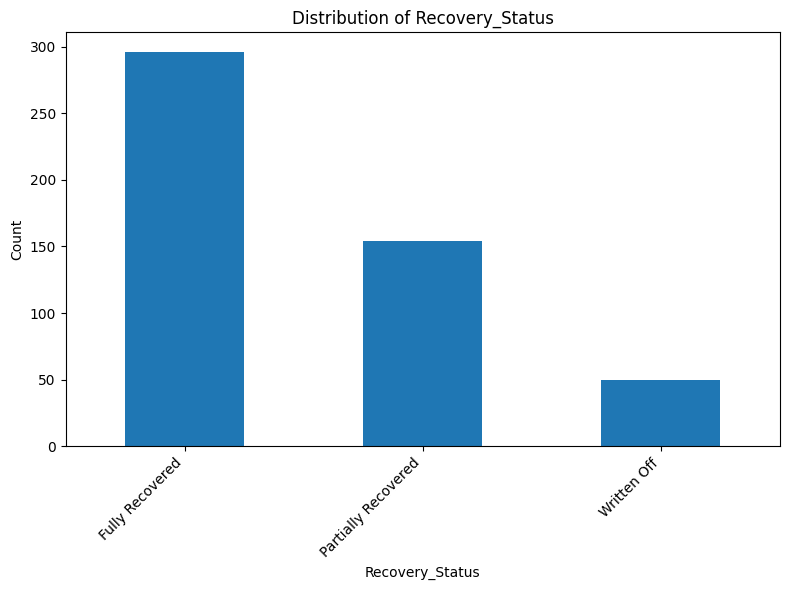

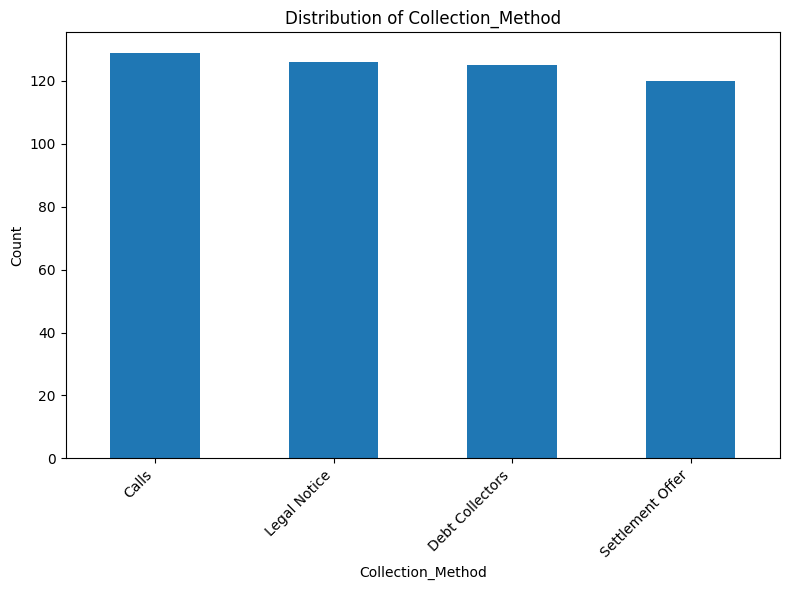

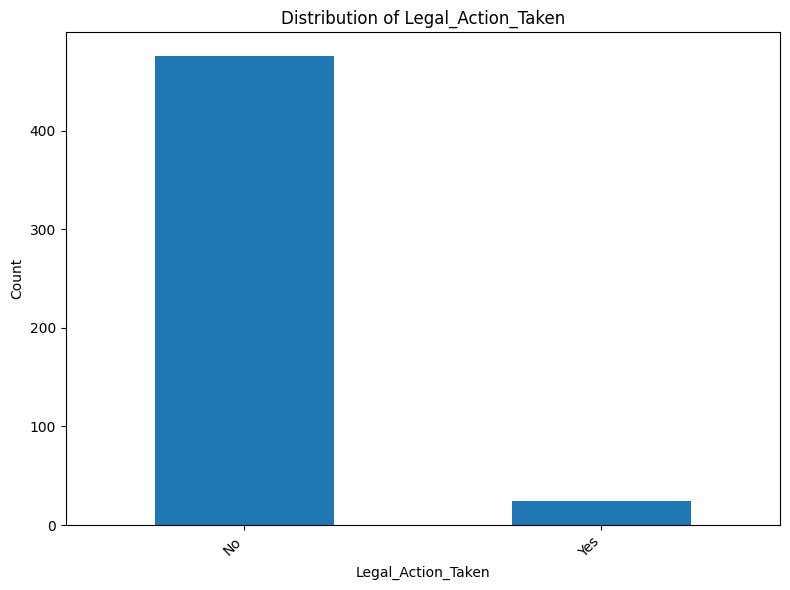

In [8]:
# plot bar chart for categorical

import matplotlib.pyplot as plt
# Get categorical columns
categorical_cols = lr.select_dtypes(include='category').columns

# Plot bar charts for categorical columns
for col in categorical_cols:
  plt.figure(figsize=(8, 6))
  lr[col].value_counts().plot(kind='bar')
  plt.title(f'Distribution of {col}')
  plt.xlabel(col)
  plt.ylabel('Count')
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

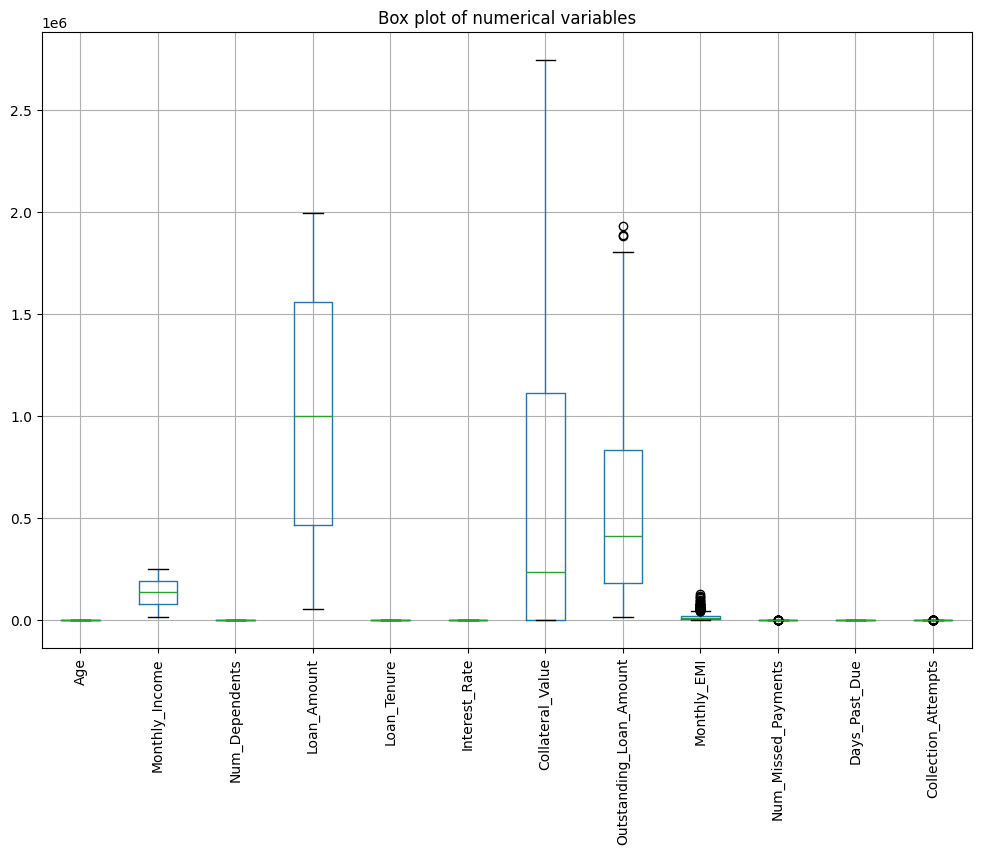

In [9]:
# plot the box plot for numerical value of the data set provided

import matplotlib.pyplot as plt
numerical_cols = lr.select_dtypes(include=['number']).columns
plt.figure(figsize=(12, 8))
lr[numerical_cols].boxplot()
plt.title('Box plot of numerical variables')
plt.xticks(rotation=90)
plt.show()

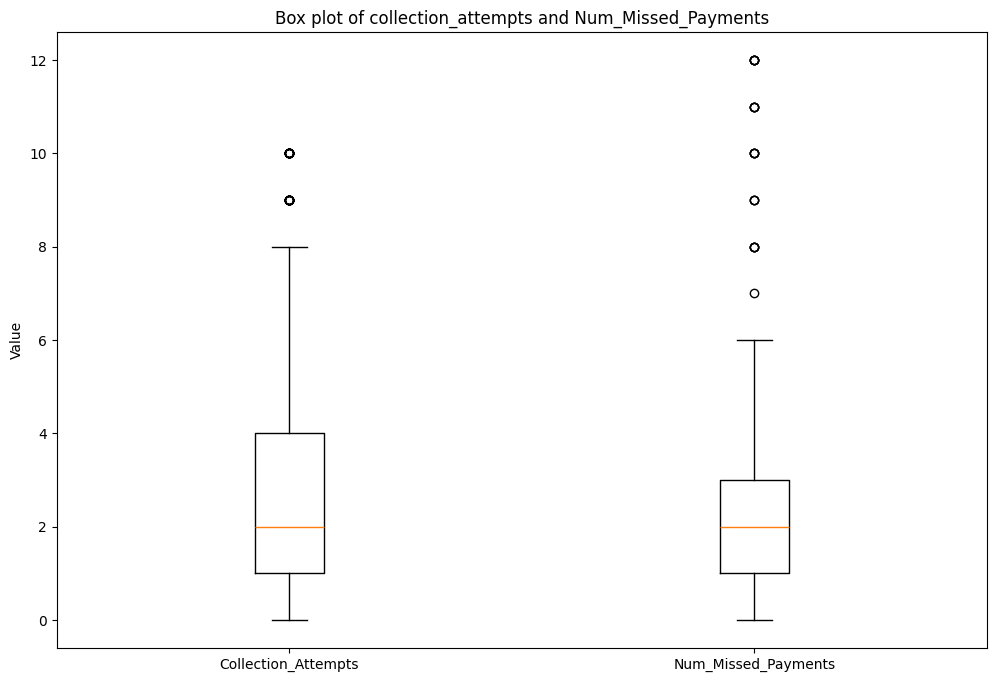

In [10]:
#visualising the box plot of collection attempts and num of missed payment to see where the outliars lie
plt.figure(figsize=(12, 8))
plt.boxplot(lr[['Collection_Attempts','Num_Missed_Payments']])
plt.title('Box plot of collection_attempts and Num_Missed_Payments')
plt.ylabel('Value')
plt.xticks([1, 2], ['Collection_Attempts', 'Num_Missed_Payments']) # Add this line to label the box plots
plt.show()

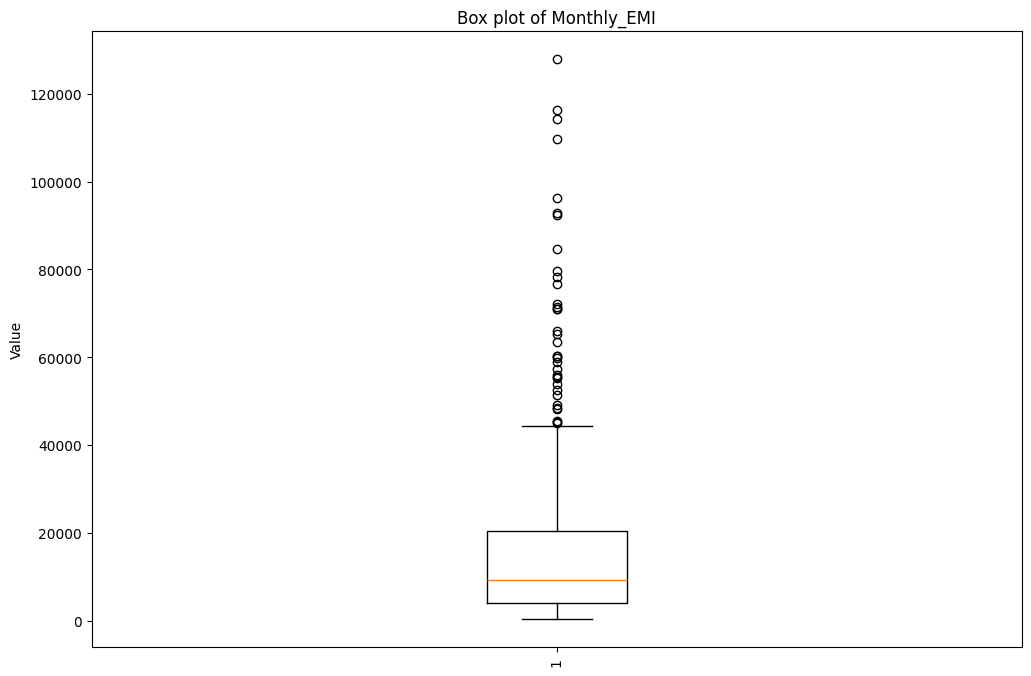

In [11]:
#visualising the monthly EMI to see where the outliars lie
plt.figure(figsize=(12, 8))
plt.boxplot(lr[['Monthly_EMI']]),
plt.title('Box plot of Monthly_EMI')
plt.ylabel('Value')
plt.xticks(rotation=90)
plt.show()

Base on the box plot visualisation , the Monthly_EMI, the collection attempts, number of missed payments and outstanding loans have outliars.

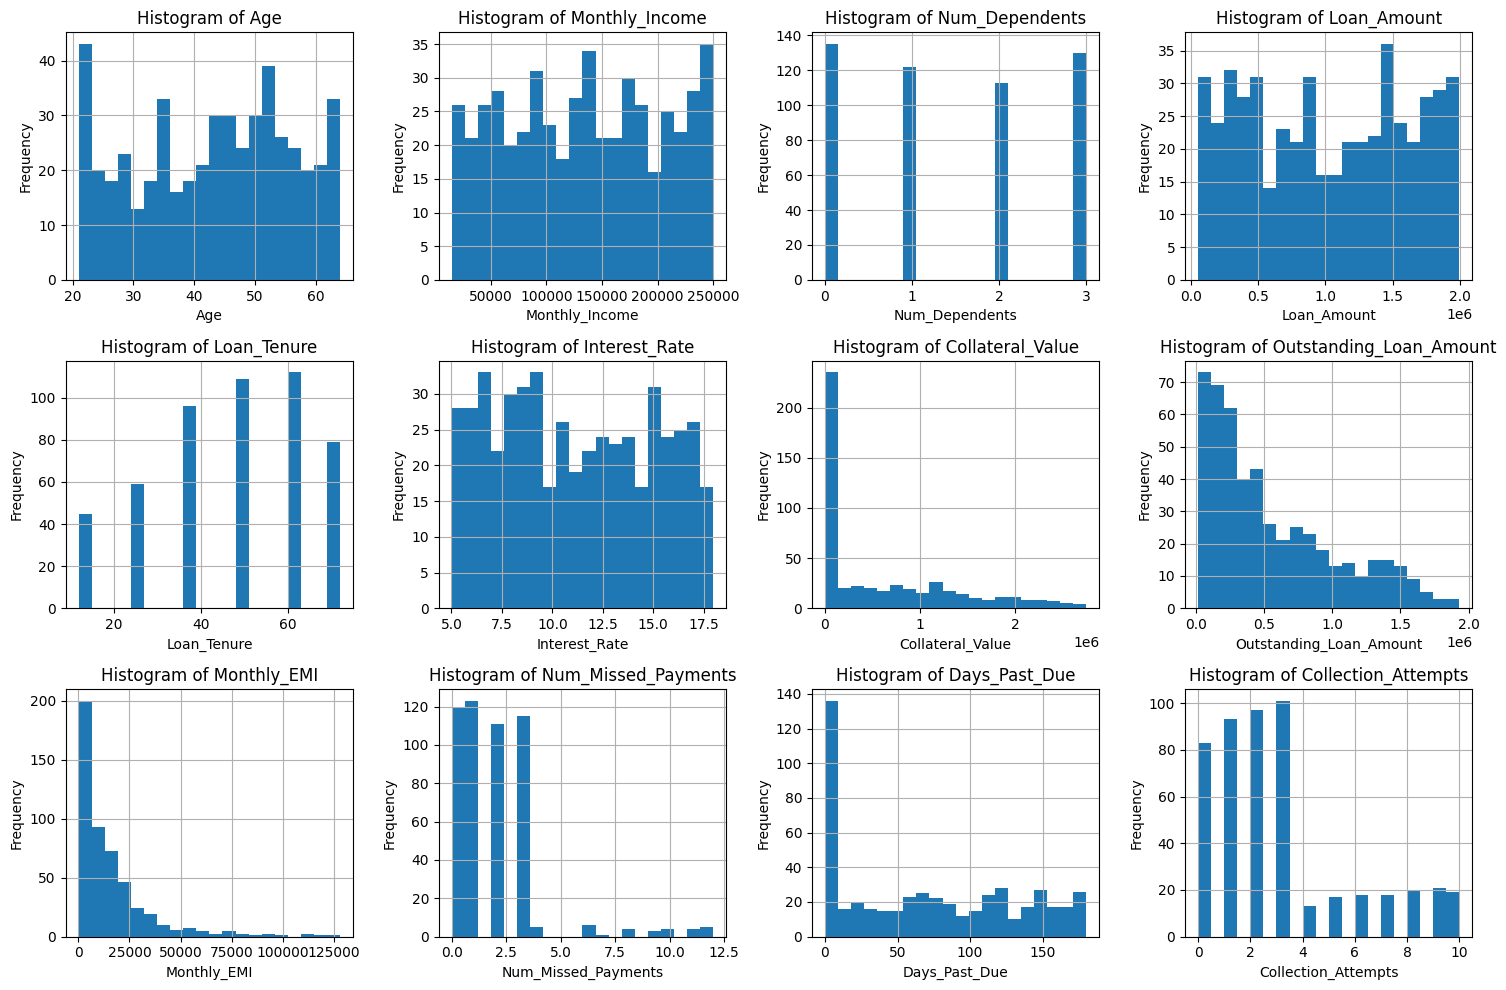

In [12]:
# plot histogram of  numerical values

import matplotlib.pyplot as plt
# Select numerical columns
numerical_cols = lr.select_dtypes(include=['number']).columns
# Plot histogram for all numerical columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(3, 4, i + 1)
  lr[col].hist(bins=20)
  plt.title(f'Histogram of {col}')
  plt.xlabel(col)
  plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

CHECK THE CORRELATION

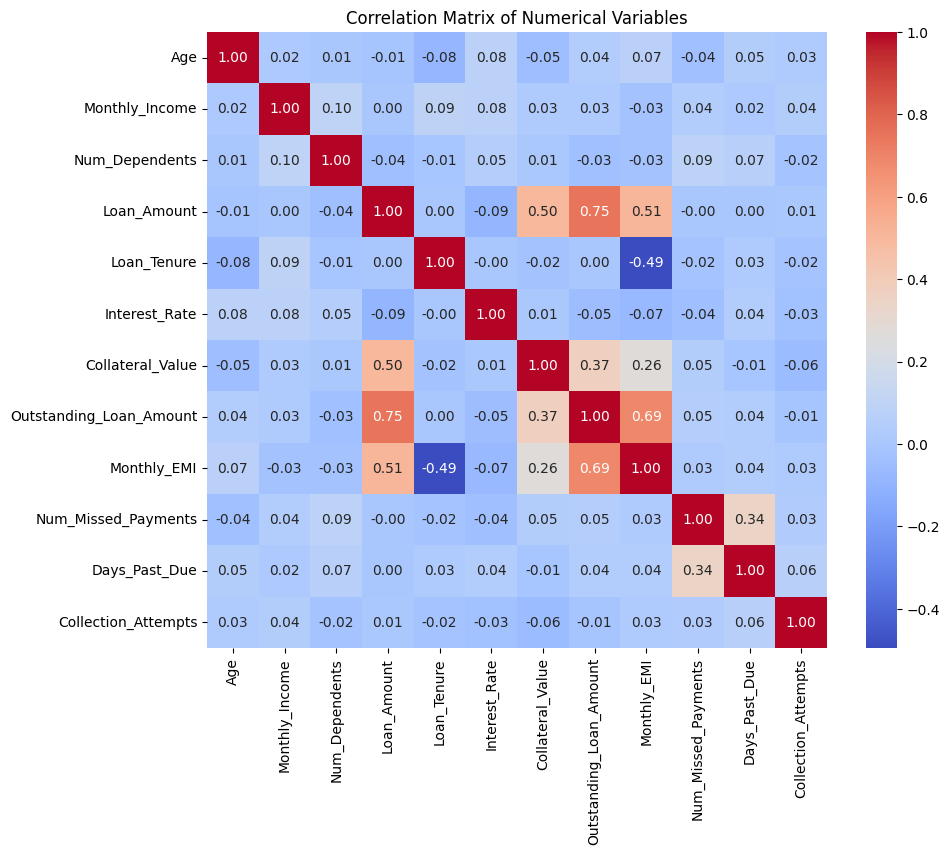

In [13]:
#  correlation for numerical variable

import matplotlib.pyplot as plt
# Calculate the correlation matrix for numerical columns
correlation_matrix = lr[numerical_cols].corr()

# Display the correlation matrix
#print("Correlation Matrix:")
#print(correlation_matrix)

import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

from the heat map above , loan amount and outstanding loan are highly correlated with. before dropping one , i will check the association with the target variable using ANOVA to find out which one to remove

In [14]:
# association  of all numerical variable  with recovery status using anova

from scipy import stats

# Select numerical columns
numerical_cols = lr.select_dtypes(include=['number']).columns

# Perform ANOVA test for each numerical variable against Recovery_Status
print("ANOVA results for numerical variables and Recovery_Status:")
for col in numerical_cols:
    if col != 'Recovery_Status': # Exclude the target variable itself
        # Create groups based on Recovery_Status
        groups = [lr[col][lr['Recovery_Status'] == status] for status in lr['Recovery_Status'].unique()]

        # Perform one-way ANOVA test
        fvalue, pvalue = stats.f_oneway(*groups)
        print(f"{col}: F-value = {fvalue:.4f}, P-value = {pvalue:.4f}")


ANOVA results for numerical variables and Recovery_Status:
Age: F-value = 0.6735, P-value = 0.5104
Monthly_Income: F-value = 0.2657, P-value = 0.7668
Num_Dependents: F-value = 1.4455, P-value = 0.2366
Loan_Amount: F-value = 2.1390, P-value = 0.1189
Loan_Tenure: F-value = 0.1629, P-value = 0.8497
Interest_Rate: F-value = 0.0123, P-value = 0.9878
Collateral_Value: F-value = 2.5418, P-value = 0.0798
Outstanding_Loan_Amount: F-value = 1.6824, P-value = 0.1870
Monthly_EMI: F-value = 0.8309, P-value = 0.4362
Num_Missed_Payments: F-value = 1.0828, P-value = 0.3394
Days_Past_Due: F-value = 0.9984, P-value = 0.3692
Collection_Attempts: F-value = 136.4253, P-value = 0.0000


base on this result , the loan amount has a stronger association with the recovery status than the outstanding loan amount .Using my business understanding outstanding loan is more important than loan amount to know as it reflects the current financial exposure and recovery efforts are based on what is recoverable and not what was originally burrowed .

In [15]:
# chisquare for categorical variable except recovery status

import pandas as pd
# Select categorical columns (excluding Recovery_Status)
categorical_cols_without_target = lr.select_dtypes(include='category').columns.drop('Recovery_Status', errors='ignore')

print("Association between categorical variables (excluding Recovery_Status) using Chi-Squared test:")

# Perform Chi-Squared test for each pair of categorical variables (excluding Recovery_Status)
for i in range(len(categorical_cols_without_target)):
    for j in range(i + 1, len(categorical_cols_without_target)):
        col1 = categorical_cols_without_target[i]
        col2 = categorical_cols_without_target[j]

        # Create a contingency table
        contingency_table = pd.crosstab(lr[col1], lr[col2])

        # Perform the Chi-Squared test
        chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

        print(f"Association between {col1} and {col2}: Chi-Squared = {chi2:.4f}, P-value = {p:.4f}")

# Interpret P-values: A low P-value (typically < 0.05) suggests a significant association
# between the two categorical variables.


Association between categorical variables (excluding Recovery_Status) using Chi-Squared test:
Association between Gender and Employment_Type: Chi-Squared = 0.8896, P-value = 0.6409
Association between Gender and Loan_Type: Chi-Squared = 4.2559, P-value = 0.2351
Association between Gender and Payment_History: Chi-Squared = 2.1310, P-value = 0.3446
Association between Gender and Collection_Method: Chi-Squared = 1.6640, P-value = 0.6450
Association between Gender and Legal_Action_Taken: Chi-Squared = 0.4600, P-value = 0.4976
Association between Employment_Type and Loan_Type: Chi-Squared = 7.1028, P-value = 0.3114
Association between Employment_Type and Payment_History: Chi-Squared = 2.1310, P-value = 0.7117
Association between Employment_Type and Collection_Method: Chi-Squared = 10.6147, P-value = 0.1010
Association between Employment_Type and Legal_Action_Taken: Chi-Squared = 1.1012, P-value = 0.5766
Association between Loan_Type and Payment_History: Chi-Squared = 2.3409, P-value = 0.885

collection method and legal action taken are highly correlated . I will run the chi square with the target variable to find out which one is highly significant.

In [16]:

# Find association between categorical variables and Recovery_Status using Chi-Squared test

# Select categorical columns (excluding Recovery_Status)
categorical_cols = lr.select_dtypes(include='category').columns
categorical_cols = categorical_cols.drop('Recovery_Status')

print("\nChi-Squared test results for categorical variables and Recovery_Status:")
for col in categorical_cols:
    # Create a contingency table
    contingency_table = pd.crosstab(lr[col], lr['Recovery_Status'])

    # Perform the Chi-Squared test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

    print(f"{col}: Chi-Squared = {chi2:.4f}, P-value = {p:.4f}")




Chi-Squared test results for categorical variables and Recovery_Status:
Gender: Chi-Squared = 1.7605, P-value = 0.4147
Employment_Type: Chi-Squared = 1.9137, P-value = 0.7516
Loan_Type: Chi-Squared = 6.3189, P-value = 0.3884
Payment_History: Chi-Squared = 1.1955, P-value = 0.8788
Collection_Method: Chi-Squared = 2.2663, P-value = 0.8937
Legal_Action_Taken: Chi-Squared = 226.8908, P-value = 0.0000


looking at this legal action is highly significant , so collection method will be dropped.

CHECKING SKEWNESS

In [17]:
# skewness of numerical  variable

numerical_cols = lr.select_dtypes(include=['number']).columns
skewness = lr[numerical_cols].skew()
print("Skewness of numerical variables:")
skewness


Skewness of numerical variables:


,0
Age,-0.162218
Monthly_Income,-0.002889
Num_Dependents,0.039021
Loan_Amount,0.001857
Loan_Tenure,-0.281297
Interest_Rate,0.111805
Collateral_Value,1.053850
Outstanding_Loan_Amount,0.930591
Monthly_EMI,2.625062
Num_Missed_Payments,2.576384


I will cap and floor variables with skewness > +1 or > -1 which includes
monthly_emi, number of missed payments,collateral value , collection attempts

In [18]:
#fixing skewness
import numpy as np

columns_to_cap_floor = ['Monthly_EMI', 'Num_Missed_Payments', 'Collateral_Value','Collection_Attempts']

for col_name in columns_to_cap_floor:

    Q1 = lr[col_name].quantile(0.25)
    Q3 = lr[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Apply floor and cap
    lr[col_name] = np.where(lr[col_name] < lower_bound, lower_bound, lr[col_name])
    lr[col_name] = np.where(lr[col_name] > upper_bound, upper_bound, lr[col_name])

print(lr.drop(['Loan_ID', 'Borrower_ID'], axis=1, errors='ignore').select_dtypes(include=['number']).skew())

Age                       -0.162218
Monthly_Income            -0.002889
Num_Dependents             0.039021
Loan_Amount                0.001857
Loan_Tenure               -0.281297
Interest_Rate              0.111805
Collateral_Value           1.053850
Outstanding_Loan_Amount    0.930591
Monthly_EMI                1.121566
Num_Missed_Payments        0.991638
Days_Past_Due              0.258856
Collection_Attempts        0.957762
dtype: float64



Distribution of Recovery_Status:
Recovery_Status
Fully Recovered        296
Partially Recovered    154
Written Off             50
Name: count, dtype: int64


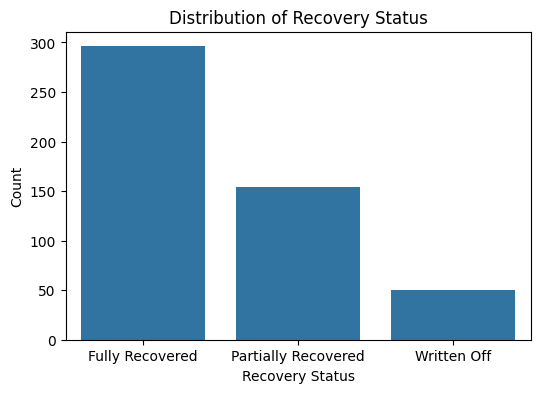

In [19]:
  #CHECK IF DATA SET IS BALANCE

import matplotlib.pyplot as plt
# Check the distribution of the target variable 'Recovery_Status'
print("\nDistribution of Recovery_Status:")
print(lr['Recovery_Status'].value_counts())

# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Recovery_Status', data=lr)
plt.title('Distribution of Recovery Status')
plt.xlabel('Recovery Status')
plt.ylabel('Count')
plt.show()

To conclude , I did cap and floor on my skewed variable and the skewness is way more better . Though the skewness is not less than 1, I will allow it like that as it is just few decimals from 1 and also for easy interpretation. for my feature engineering,the get dummies function and drop one  will be use on categorical variable.The loan amount ,the collection method ,Borrower ID and loan ID will be drop.
for easy model interpretation,I will do a two stage model .my target variable will be changed to written off and recovered( for both partially and fully recoverd). followed by if recovered was it fully or partially .